<a href="https://colab.research.google.com/github/sun9huni/first-repository/blob/main/0520_%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5_%2B_%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5-2 차원 축소



In [ ]:
# 차원 축소
# feature가 많을수록 데이터의 차원이 커지는데 데이터셋의 크기에 비해 feature가 많아질경우 이를 표현하기 위한 변수가 발생되기 한다.
# 이러한 문제를 해결하기 위해 차원 축소 방법이 사용된다.
# PCA(Principal Component Analysis)

# 차원 축소 기법 중 대표적인 기법
# 고차원에서 저차원으로 축소하는 선형 투영 기법
# 데이터의 차원이 증가할 수록 거리가 증가하고, 오버피팅 가능성이 커짐

# PCA 단계

# 데이터에서 분산이 최대인 축을 찾음 (첫번째 축)
# 첫번째 축과 직교하면서 분산이 최대인 축을 찾음 (두번째 축)
# 첫번째와 두번째 축에 직교하고, 분산이 최대인 축을 찾음 (세번째 축)

In [3]:
import pandas as pd

# 와인 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [4]:
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


1. 스탠다드 스케일링
- 특성별로 데이터 스케일이 다를 경우 머신러닝 모델이 원할하게 작동하는 데 어려움을 겪을 수 있어 데이터 스케일링을 통해 데이커 값의 범위나 분포를 같게 만들어줘야 한다.
- 스탠다드 스케일링은 데이터 스케일링의 한 종류로서 데이터가 표준정규분포를 갖도록 스케일링

In [5]:
# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data[:3]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [6]:
# 데이터 복사(df변수)
df = data.copy()

# PCA
- 2차원이나 3차원으로 축소할 경우 시각화가 가능하다는 장점이 있다.

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components = 2)

In [10]:
df = pca.fit_transform(df)

In [11]:
df.shape

(178, 2)

In [12]:
df[:3]

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ]])

# 3. PCA(2차원) 시각화

In [14]:
# 시각화 라이브러리
import matplotlib.pyplot as plt

In [15]:
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


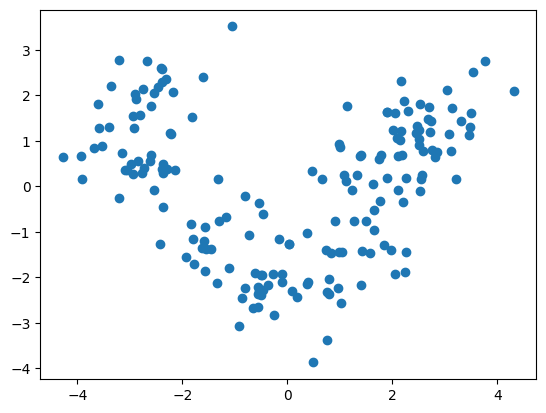

In [16]:
#scatter
plt.scatter(df.iloc[:,0],df.iloc[:,1])

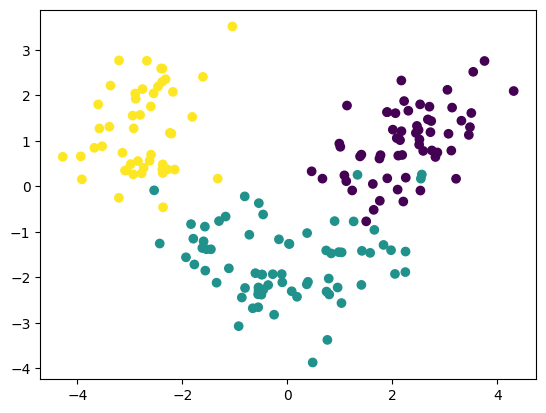

In [18]:
# scatter (c = target)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = dataset.target)

In [19]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749 ]
0.5540633835693526


# 4. 지도 학습 (PCA 전후 비교)

In [21]:
# PCA 후 데이터로 머신러닝 (2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state = 2025)
cross_val_score(model, df, dataset.target, scoring = 'accuracy', cv = 5).mean()

np.float64(0.954920634920635)

In [22]:
# PCA전 데이터로 머신러닝 (13)
cross_val_score(model, data, dataset.target, scoring = 'accuracy', cv = 5).mean()

np.float64(0.9552380952380952)

# 5. PCA(3차원) 시각화



In [23]:
# 새 데이터 복사
df = data.copy()

In [24]:
# pca (n_compoenets = 3)
pca = PCA(n_components = 3)

In [26]:
# pca 변환
df = pca.fit_transform(df)

In [27]:
# 데이터 프레임 변환
df = pd.DataFrame(df)

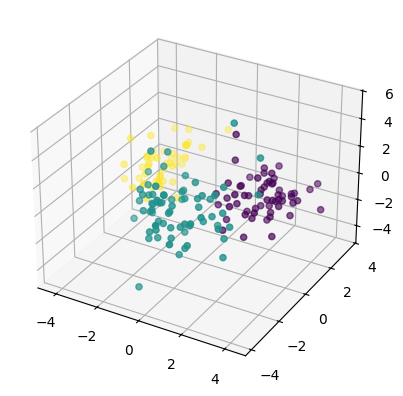

In [28]:
# 시각화(3차원)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.iloc[:,0], df.iloc[:,1],df.iloc[:,2], c = dataset.target)

# 6. 점진적 PCA
- 데이터 셋이 큰 경우 활용 (배치를 통해 점진적 수행)


In [29]:
# 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA

In [30]:
# 데이터 복사
df = data.copy()

In [31]:
# 점진적 PCA
pca = IncrementalPCA(n_components = 2, batch_size = 16)


In [32]:
# 점진적 PCA 변환
df = pca.fit_transform(df)

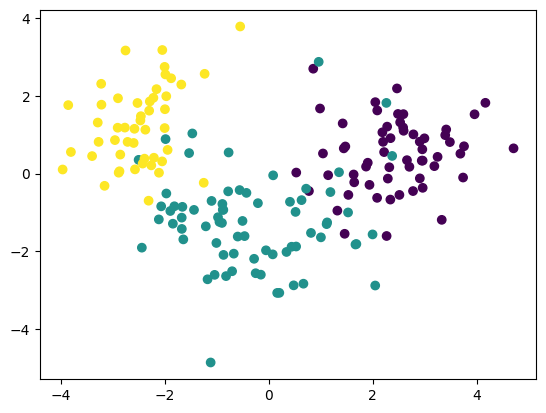

In [33]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0],df.iloc[:,1], c = dataset.target)

In [34]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3400206  0.15239134]
0.4924119400154383


# 7. 희소 PCA
- 적절한 희소성을 유지 (alpha값을 조정)
- 오버피팅 방지

In [35]:
# 라이브러리 불러오기
from sklearn.decomposition import SparsePCA

In [36]:
# 데이터 복사
df = data.copy()

In [38]:
# 희소 PCA
pca = SparsePCA(n_components = 2, alpha = 0.01)

In [39]:
# 희소 PCA 변환
df = pca.fit_transform(df)

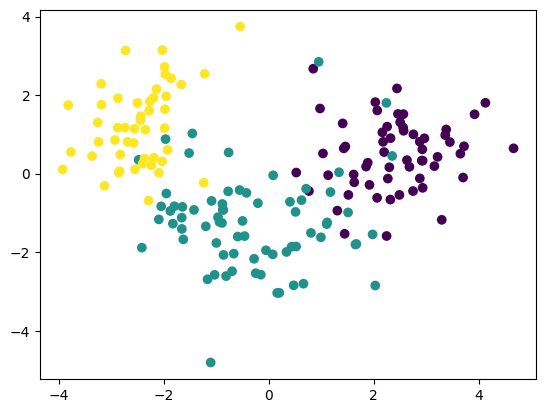

In [40]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = dataset.targetb)

# 8. 커널 PCA
- 비선형으로 차원축소

In [42]:
# 라이브러리 불러오기
from sklearn.decomposition import KernelPCA

In [43]:
# 데이터 복사
df = data.copy()

In [45]:
# 커널 PCA
pca = KernelPCA(n_components = 2)

In [46]:
# 커널 PCA 변환
df = pca.fit_transform(df)

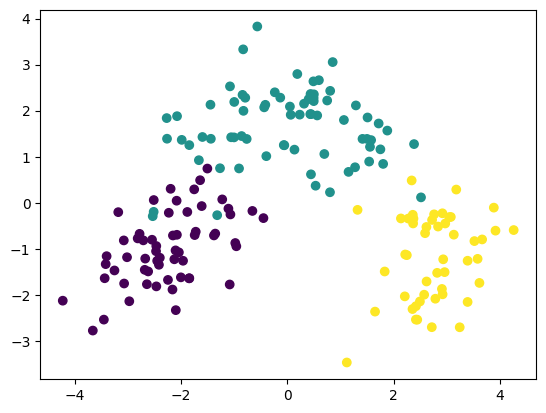

In [47]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = dataset.target)

# 9. SVD(Singular Value Decomposition) 특이값 분해
- 행렬을 특정한 구조로 분해하는 방식
- 신호 처리와 통계학 등의 분야에서 자주 사용됨

In [48]:
# 라이브러리 불러오기
from sklearn.decomposition import TruncatedSVD

In [49]:
# SVD 적용
df = data.copy()
pca = TruncatedSVD(n_components = 2)
df = pca.fit_transform(df)

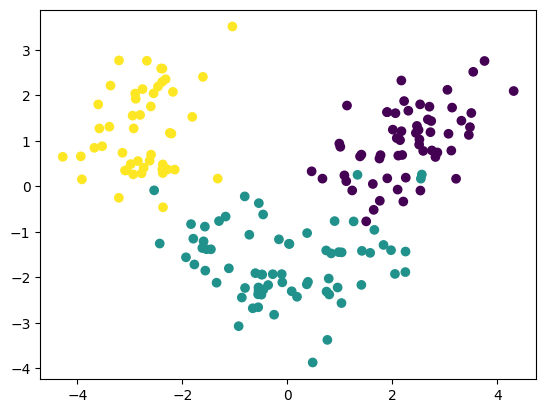

In [50]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = dataset.target)